## Part 1
1. State the fundamental hypothesis under which the Ordinary Least Squares (OLS) estimators are unbiased. 

test

2. Show that under this assumption the OLS estimators are indeed unbiased.

3. Explain the sample selection bias with an example from the course. 

4. Explain the omitted variable bias with an example from the course 

5. Explain the problem of multicollinearity. Is it a problem in this dataset? 

6. Create three categories of nox levels (low, medium, high), corresponding to the following percentiles: 0-25%, 26%-74%, 75%-100% 

In [36]:
import numpy as np
import pandas as pd

raw_data_path = 'textfiles/HPRICE2.raw'
labels_path = 'textfiles/HPRICE2.DES'

raw_data = np.loadtxt(raw_data_path)

with open(labels_path, 'r') as file:
    file.readline()
    file.readline()
    
    labels_line = file.readline().strip()
    labels = np.array(labels_line.split())

df = pd.DataFrame(raw_data, columns=labels)

nox_percentiles_threshholds = np.percentile(df['nox'], [25, 50, 75])
nox_categories = np.digitize(df['nox'], nox_percentiles_threshholds)

df['nox_category'] = nox_categories

low_nox = df[df['nox_category'] == 0]
medium_nox = df[df['nox_category'] == 1]
high_nox = df[df['nox_category'] == 2]

" print('Low NOx: ', low_nox)\nprint('Medium NOx: ', medium_nox)\nprint('High NOx: ', high_nox) "

7. Compute for each category of nox level the average median price and comment on your
results

In [41]:
print('Price means')
print('Low NOx: ', round(low_nox['price'].mean(), 2))
print('Medium NOx: ', round(medium_nox['price'].mean(), 2))
print('High NOx: ', round(high_nox['price'].mean(), 2))

# TO DO: comment the results

Price means
Low NOx:  27079.58
Medium NOx:  25530.69
High NOx:  20624.14


8. Produce a scatter plot with the variable price on the y-axis and the variable nox on the x-axis. Is this a ceteris paribus effect? 

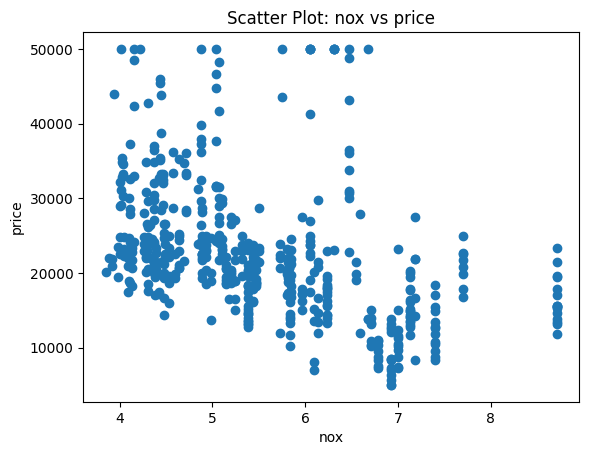

In [42]:
import matplotlib.pyplot as plt

plt.scatter(df['nox'], df['price'])
plt.xlabel('nox')
plt.ylabel('price')
plt.title('Scatter Plot: nox vs price')
plt.show()

# TO DO: comment the results

9. Run a regression of price on a constant, crime, nox, rooms, proptax. Comment on the histogram of the residuals. Interpret all coefficients. 

Interpretations

**All constant**
- **Coefficient:** -18,680
- **Interpretation:** When all independent variables (crime, nox, rooms, proptax) are zero, the predicted value of the dependent variable (price) is -18,680. This may not have much sense.

**Variable "crime":**
- **Coefficient:** -136.5438
- **Interpretation:** Holding other variables constant, a one-unit increase in the "crime" variable is associated with a decrease in the predicted value of the price by 136.5438 units.

**Variable "nox":**
- **Coefficient:** -660.4672
- **Interpretation:** Holding other variables constant, a one-unit increase in the "nox" variable is associated with a decrease in the predicted value of the price by 660.4672 units.

**Variable "rooms":**
- **Coefficient:** 7797.9286
- **Interpretation:** Holding other variables constant, a one-unit increase in the "rooms" variable is associated with an increase in the predicted value of the price by 7797.9286 units.

**Variable "proptax":**
- **Coefficient:** -89.4144
- **Interpretation:** Holding other variables constant, a one-unit increase in the "proptax" variable is associated with a decrease in the predicted value of the price by 89.4144 units.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           1.06e-91
Time:                        17:04:27   Log-Likelihood:                -5119.6
No. Observations:                 506   AIC:                         1.025e+04
Df Residuals:                     501   BIC:                         1.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.868e+04   3215.205     -5.811      0.0

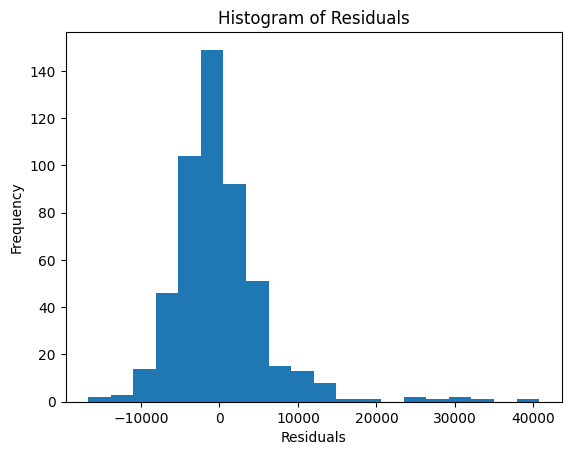

In [45]:
import statsmodels.api as sm

# Define the independent variables
X = df[['crime', 'nox', 'rooms', 'proptax']]
X = sm.add_constant(X)  # Add a constant column

# Define the dependent variable
y = df['price']

# Fit the regression model
model = sm.OLS(y, X).fit()
residuals = model.resid

print(model.summary())

plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

10. Run a regression of lprice on a constant, crime, nox, rooms, proptax. Comment on the histogram of the residuals. Interpret all coefficients. 

Interpretations

**All constant**
- **Coefficient:** 8.6550
- **Interpretation:** When all independent variables (crime, nox, rooms, proptax) are zero, the predicted value of the price is 8.6550.

**Variable "crime"**
- **Coefficient:** -0.0125
- **Interpretation:** Holding other variables constant, a one-unit increase in the "crime" variable is associated with a decrease in the predicted value of the price by 0.0125 units.

**Variable "nox"**
- **Coefficient:** -0.0476
- **Interpretation:** Holding other variables constant, a one-unit increase in the "nox" variable is associated with a decrease in the predicted value of the price by 0.0476 units.

**Variable "rooms"**
- **Coefficient:** 0.2816
- **Interpretation:** Holding other variables constant, a one-unit increase in the "rooms" variable is associated with an increase in the predicted value of the price by 0.2816 units.

**Variable "proptax"**
- **Coefficient:** -0.0043
- **Interpretation:** Holding other variables constant, a one-unit increase in the "proptax" variable is associated with a decrease in the predicted value of the price by 0.0043 units.


                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     196.9
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          2.50e-101
Time:                        17:43:15   Log-Likelihood:                -26.367
No. Observations:                 506   AIC:                             62.73
Df Residuals:                     501   BIC:                             83.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6550      0.137     63.320      0.0

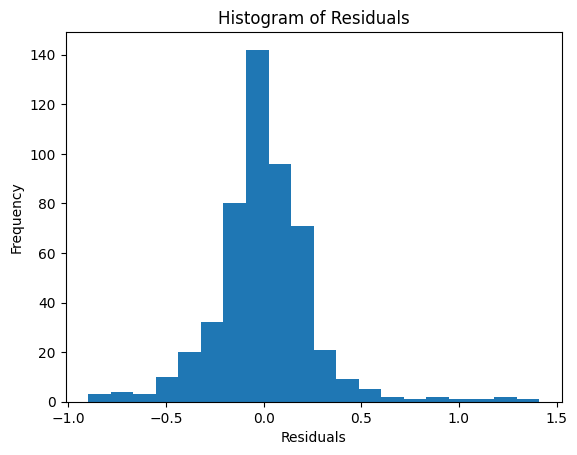

In [46]:
import statsmodels.api as sm

# Define the independent variables
X = df[['crime', 'nox', 'rooms', 'proptax']]
X = sm.add_constant(X)  # Add a constant column

# Define the dependent variable
y = df['lprice']

# Fit the regression model
model = sm.OLS(y, X).fit()
residuals = model.resid

print(model.summary())

plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

11. Run a regression of lprice on a constant, crime, lnox, rooms, lproptax. Comment on the histogram of the residuals. Interpret all coefficients.

Interpretations

**All constant**
- **Coefficient:** 8.8553
- **Interpretation:** When all independent variables (crime, nox, rooms, proptax) are zero, the predicted value of the price is 8.8553.

**Variable "crime"**
- **Coefficient:** -0.0125
- **Interpretation:** Holding other variables constant, a one-unit increase in the "crime" variable is associated with a decrease in the predicted value of the price by 0.0125 units.

**Variable "nox"**
- **Coefficient:** -0.0476
- **Interpretation:** Holding other variables constant, a one-unit increase in the "nox" variable is associated with a decrease in the predicted value of the price by 0.0476 units.

**Variable "rooms"**
- **Coefficient:** 0.2816
- **Interpretation:** Holding other variables constant, a one-unit increase in the "rooms" variable is associated with an increase in the predicted value of the price by 0.2816 units.

**Variable "proptax"**
- **Coefficient:** -0.0042
- **Interpretation:** Holding other variables constant, a one-unit increase in the "proptax" variable is associated with a decrease in the predicted value of the price by 0.0042 units.

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     196.8
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          2.71e-101
Time:                        17:52:51   Log-Likelihood:                -26.450
No. Observations:                 506   AIC:                             62.90
Df Residuals:                     501   BIC:                             84.03
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8553      0.172     51.445      0.0

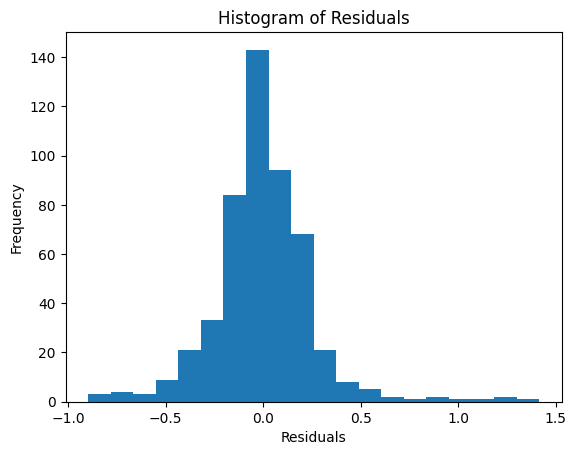

In [48]:
import statsmodels.api as sm

# Define the independent variables
X = df[['crime', 'lnox', 'rooms', 'proptax']]
X = sm.add_constant(X)  # Add a constant column

# Define the dependent variable
y = df['lprice']

# Fit the regression model
model = sm.OLS(y, X).fit()
residuals = model.resid

print(model.summary())

plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

11. In the specification of question 10, test the hypothesis H0: $\beta_{nox}$ <0 vs. H1: $\beta_{nox}$ > 0 at the 1% level.

Answer:

We'll use the t-test on the coefficient associated with the variable "nox" in the linear regression model.

In [51]:
import statsmodels.api as sm

# Run the regression model
X = df[['crime', 'nox', 'rooms', 'proptax']]
X = sm.add_constant(X)
y = df['lprice']
model = sm.OLS(y, X).fit()

# Define the hypothesis test
hypothesis = 'nox < 0'

# Perform the t-test on the hypothesis
t_test_result = model.t_test(hypothesis)

# Get the p-value from the test result
p_value = t_test_result.pvalue.item()

# Set the significance level
alpha = 0.01

# Compare the p-value with the significance level
if p_value < alpha:
    print(f'Reject the null hypothesis. p-value: {p_value:.4f}')
else:
    print(f'Fail to reject the null hypothesis. p-value: {p_value:.4f}')

PatsyError: unrecognized token in constraint
    nox > 0
        ^